In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/Users/nikhilvarma/Documents/datasets/data/adult.csv")
data.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [33]:
#GETTING INFO ABOUT ROWS, COLUMNS, DATATYPES OF EACH COLUMN AND MEMORY REQUIREMENT
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [43]:
#FETCH RANDOM SAMPLES FROM THE DATASET ABOUT 50%
data.sample(frac = 0.50,random_state = 100)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
12393,37,Private,110331,Prof-school,15,Married-civ-spouse,Other-service,Wife,White,Female,0,0,60,United-States,>50K
48701,23,Private,45834,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,<=50K
17918,28,Private,89718,HS-grad,9,Never-married,Sales,Not-in-family,White,Female,2202,0,48,United-States,<=50K
11352,30,Private,351770,9th,5,Divorced,Other-service,Unmarried,White,Female,0,0,38,United-States,<=50K
36198,31,Private,164190,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48573,41,Private,318046,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,48,United-States,>50K
47252,41,Local-gov,33658,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,45,United-States,>50K
33142,69,Private,312653,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,25,United-States,<=50K
2965,21,?,334593,Some-college,10,Never-married,?,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [55]:
#CHECK FOR NULL

#METHOD-1
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<Axes: >

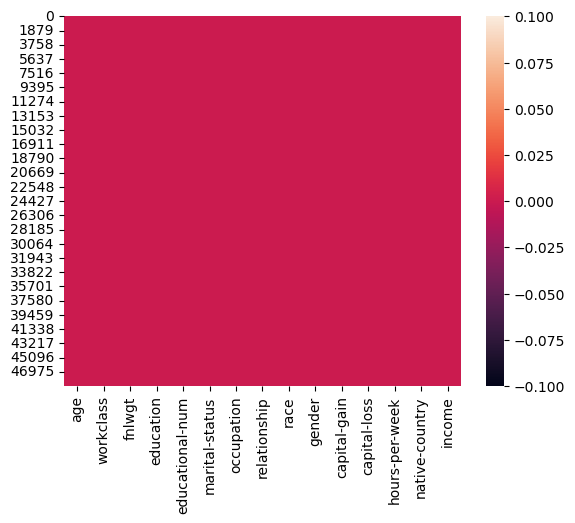

In [57]:
#METHOD-2
sns.heatmap(data.isnull())

In [65]:
#REPLACE ? WITH NAN
data.isin(["?"]).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [67]:
import numpy as np
data['workclass'].replace('?',np.nan,inplace= True)
data['occupation'].replace('?',np.nan,inplace= True)
data['native-country'].replace('?',np.nan,inplace= True)
data.isin(["?"]).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [83]:
#DROP ALL THE MISSING VALUES
data.dropna(how = "any",inplace = True)
data.shape

(45222, 15)

In [91]:
#CHECK FOR DUPLICATE AND DROP
dup = data.duplicated().any()
dup

True

In [97]:
data.drop_duplicates(inplace= True)
data.shape

(45175, 15)

In [99]:
data.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K


In [105]:
#Display people who are black and never married
data[(data['race'] == 'Black') & (data['marital-status'] == 'Never-married')]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
21,34,Private,238588,Some-college,10,Never-married,Other-service,Own-child,Black,Female,0,0,35,United-States,<=50K
91,49,Federal-gov,77443,7th-8th,4,Never-married,Other-service,Not-in-family,Black,Male,0,0,20,United-States,<=50K
101,33,Private,202191,Some-college,10,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,35,United-States,<=50K
102,22,Private,212261,Some-college,10,Never-married,Transport-moving,Own-child,Black,Male,0,0,39,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48780,25,Private,403788,HS-grad,9,Never-married,Craft-repair,Other-relative,Black,Male,0,0,40,United-States,<=50K
48786,33,Private,182401,10th,6,Never-married,Adm-clerical,Not-in-family,Black,Male,0,0,40,United-States,<=50K
48792,25,Local-gov,514716,Bachelors,13,Never-married,Adm-clerical,Own-child,Black,Female,0,0,40,United-States,<=50K
48816,22,Private,325033,12th,8,Never-married,Protective-serv,Own-child,Black,Male,0,0,35,United-States,<=50K


In [125]:
#Display white population that make above 50k
data[(data['race'].isin(['White'])) & (data['gender'].isin(['Male','Female'])) & (data['income'] == "<=50K")]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48833,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [133]:
filter1 = data['race'].isin(['White'])
filter2 = data['marital-status'].isin(['Never-married','Married-civ-spouse'])
filter3 = data['income'].isin(['<=50K'])
data[filter1 & filter2 & filter3]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48831,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
48833,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


In [135]:
data.drop(['capital-gain','capital-loss'],inplace= True)
data.head(2)

KeyError: "['capital-gain', 'capital-loss'] not found in axis"

In [143]:
data.shape

(45175, 13)

<Axes: >

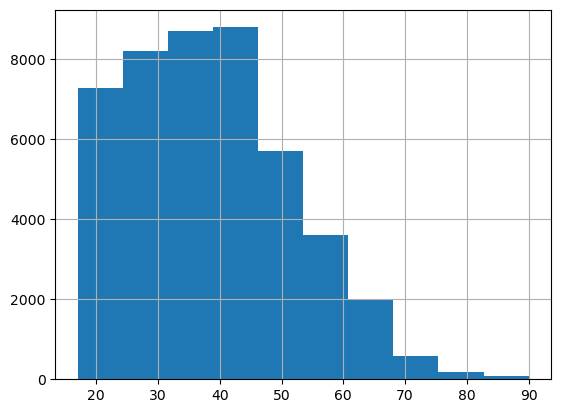

In [145]:
data['age'].hist()

In [159]:
#NUMBER OF PEOPLE IN BETWEEN AGES OF 17 and 48
len(data[data['age'].between(17,48)])

34858

In [177]:
#NUMBER OF PEOPLE WITH BACHELORS OR MASTERS DEGREE
#METHOD-1
len(data[data['education'].isin(['Bachelors','Masters'])])

10072

In [173]:
#METHOS-2
filter1 = data['education'].isin(['Bachelors'])
filter2 = data['education'].isin(['Masters'])
len(data[filter1 | filter2])

10072

<Axes: xlabel='gender', ylabel='age'>

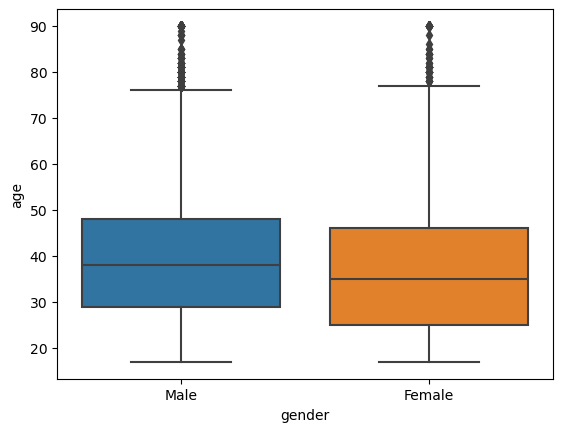

In [185]:
#BIVARIATE ANALYSIS

#RELATIONSHIP BETWEEN 2 COLUMNS

sns.boxplot(x = 'gender',y = 'age',data = data)

In [187]:
#REPLACE SALARY VALUES WITH ['<=50K','>50K'] WITH 0 AND 1
data['income'].replace('<=50K',0,inplace= True)
data['income'].replace('>50K',1, inplace = True)
data.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0


In [209]:
data.groupby('workclass')['income'].mean().sort_values(ascending = False)

workclass
Self-emp-inc        0.554407
Federal-gov         0.390469
Local-gov           0.295161
Self-emp-not-inc    0.279051
State-gov           0.267215
Private             0.217816
Without-pay         0.095238
Name: income, dtype: float64

In [221]:
data.groupby('gender')['income'].mean().sort_values(ascending= False)

gender
Male      0.312609
Female    0.113692
Name: income, dtype: float64